# Predicting Fluid Torque on Vertical Axis Wind Turbines

## The Problem

Vertical Axis Wind Turbines (VAWTs) can suffer mechanical damage if they do not break before reaching peak generator power. Breaking these turbines too far in advance, however, leads to lower power output. It is therefore important to predict the fluid torque that may cause a turbine to reach this state before it happens.


## The Data

## The Conclusions

## The Approach

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

All units are SI

Data was recorded at 1000 Hz

dTheta and ddTheta use future info. Extension: make past info only versions

In [42]:
#load packages
import pandas as pd
from pandas.io.json import json_normalize
import json
import os

import seaborn as sns

#set seaborn style
sns.set(style="whitegrid", palette="colorblind", color_codes=True, context='talk')

%matplotlib inline

In [17]:
cwd = os.getcwd()
data_dir = cwd + '/raw_data/high_turbulence'
os.listdir(data_dir)

['pointData.mat',
 'pointData copy 8.mat',
 'run_09.txt',
 'pointData copy.mat',
 'run_08.txt',
 'pointData copy 6.mat',
 'run_05.txt',
 'run_04.txt',
 'pointData copy 7.mat',
 'pointData copy 5.mat',
 'run_06.txt',
 'run_07.txt',
 'pointData copy 4.mat',
 'run_03.txt',
 'run_02.txt',
 'pointData copy 3.mat',
 'run_01.txt',
 'pointData copy 2.mat']

In [18]:
def load_all_runs(directory, max_run):
    for i in range(1,max_run+1):
        with open(data_dir + '/run_0'+str(i)+'.txt') as json_data:
            data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient = 'index')
        df = df.transpose()
        df['run']=i
        if i == 1:
            df_all = df
        else:
            df_all = pd.concat([df_all,df],axis=0,ignore_index=True)
    return df_all

In [19]:
df_all = load_all_runs(data_dir,9)

In [20]:
df_all.head()

torque     theta     dtheta    ddtheta     power         u  uInds  run
0  0.154538  4.688990  16.394420  23.968450  2.533564  0.685006    1.0    1
1  0.125633  4.705385  16.406404  23.968450  2.061193  0.677085    1.0    1
2  0.053472  4.721803  16.438362  47.936900  0.878988  0.681375    1.0    1
3  0.061200  4.738269  16.497998  46.224867  1.009681  0.640711    1.0    1
4  0.136655  4.754808  16.543537  40.881252  2.260764  0.671847    1.0    1

In [20]:
df_all.isna().sum()

torque          0
theta           0
dtheta          0
ddtheta         0
power           0
u          167212
uInds      167212
run             0
dtype: int64

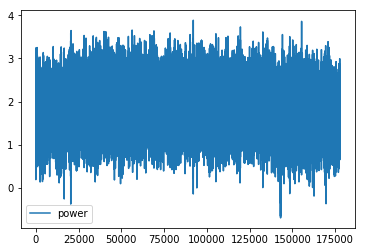

In [21]:
df_all.plot(y='power')

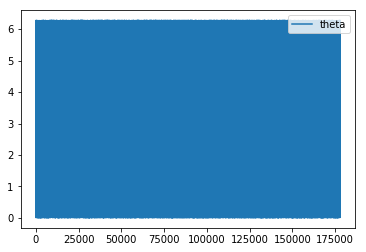

In [18]:
df_all.plot(y='theta')

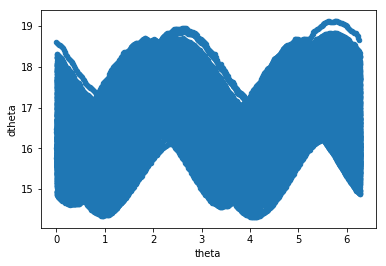

In [19]:
df_all.plot(x='theta',y='dtheta',kind='scatter')

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

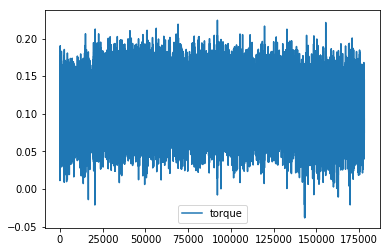

In [22]:
df_all.plot(y='torque')

In [23]:
df_all['torque_mean']=df['torque'].rolling(1000).mean()

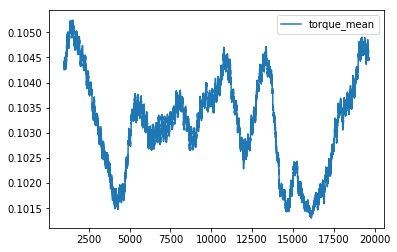

In [24]:
df_all.plot(y='torque_mean')

In [25]:
#add column for fluid torque
I = .0085 #kg/m^2
df_all['fluid_torque'] = df_all['ddtheta']*I -df_all['torque'] 

In [26]:
df_all.head()

torque     theta     dtheta    ddtheta     power         u  uInds  run  \
0  0.154538  4.688990  16.394420  23.968450  2.533564  0.685006    1.0    1   
1  0.125633  4.705385  16.406404  23.968450  2.061193  0.677085    1.0    1   
2  0.053472  4.721803  16.438362  47.936900  0.878988  0.681375    1.0    1   
3  0.061200  4.738269  16.497998  46.224867  1.009681  0.640711    1.0    1   
4  0.136655  4.754808  16.543537  40.881252  2.260764  0.671847    1.0    1   

   torque_mean  fluid_torque  
0          NaN      0.049194  
1          NaN      0.078098  
2          NaN      0.353992  
3          NaN      0.331711  
4          NaN      0.210835

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed642b0>]],
      dtype=object)

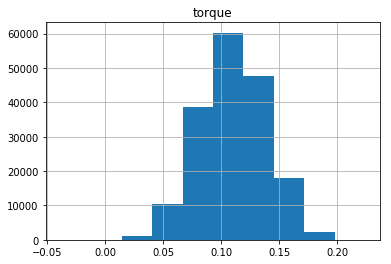

In [28]:
df_all.hist(column='torque')
#distribution of control torque is pretty normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165058d0>]],
      dtype=object)

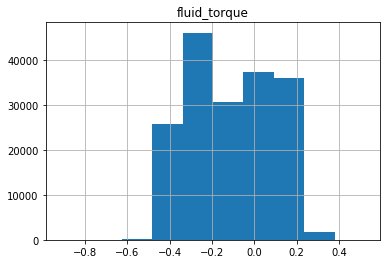

In [30]:
df_all.hist(column = 'fluid_torque')
#distribution of fluid torques is fairly flat

In [31]:
df_all.corr()

torque     theta    dtheta   ddtheta     power         u  \
torque        1.000000  0.011939  0.056708 -0.011370  0.981361  0.002892   
theta         0.011939  1.000000  0.221149 -0.150027  0.053451  0.037071   
dtheta        0.056708  0.221149  1.000000  0.000173  0.241663  0.016875   
ddtheta      -0.011370 -0.150027  0.000173  1.000000 -0.011244 -0.006340   
power         0.981361  0.053451  0.241663 -0.011244  1.000000  0.005669   
u             0.002892  0.037071  0.016875 -0.006340  0.005669  1.000000   
uInds        -0.005675  0.013692 -0.097325 -0.025709 -0.021753 -0.015773   
run          -0.061062 -0.000745 -0.087575  0.000088 -0.075052  0.007006   
torque_mean   0.041810  0.015192  0.343534 -0.106545  0.111792  0.121924   
fluid_torque -0.157387 -0.149912 -0.008118  0.989263 -0.154539 -0.006704   

                 uInds       run  torque_mean  fluid_torque  
torque       -0.005675 -0.061062     0.041810     -0.157387  
theta         0.013692 -0.000745     0.015192     -0.149912  
dtheta       -0.097325 -0.087575     0.343534     -0.008118  
ddtheta      -0.025709  0.000088    -0.106545      0.989263  
power        -0.021753 -0.075052     0.111792     -0.154539  
u            -0.015773  0.007006     0.121924     -0.006704  
uInds         1.000000  0.004505     0.842090     -0.024453  
run           0.004505  1.000000          NaN      0.009012  
torque_mean   0.842090       NaN     1.000000     -0.110986  
fluid_torque -0.024453  0.009012    -0.110986      1.000000

In [48]:
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid", palette="colorblind", color_codes=True, context='talk')

%matplotlib inline

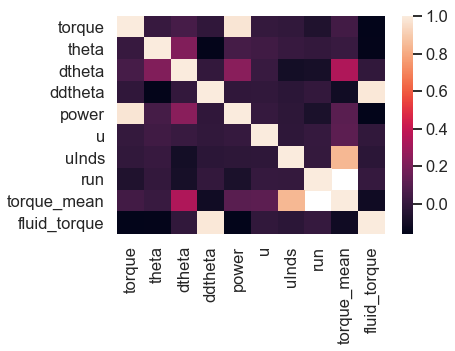

In [49]:
# calculate the correlation matrix
corr = df_all.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

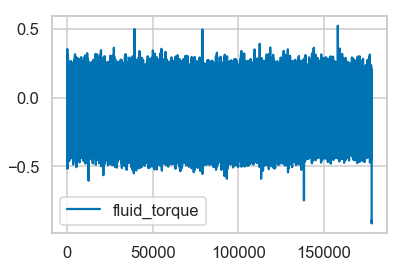

In [50]:
df_all.plot(y='fluid_torque')

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


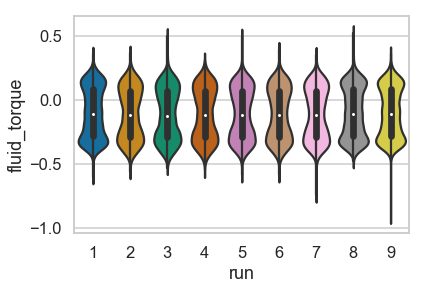

In [51]:
sns.violinplot(x ='run', y='fluid_torque', data = df_all)

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


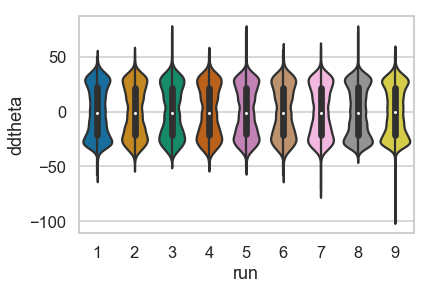

In [54]:
sns.violinplot(x='run', y='ddtheta', data = df_all)

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


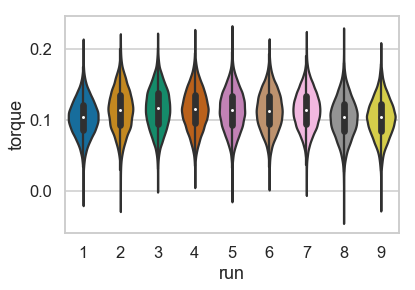

In [52]:
sns.violinplot(x ='run', y='torque', data = df_all)

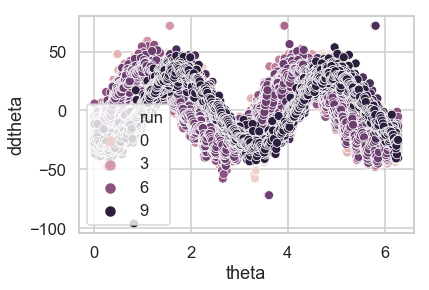

In [53]:
sns.scatterplot(x='theta', y='ddtheta', hue = 'run', data=df_all)

## Baseline Model

The only thing that is important to knowing the fluid torque is ddtheta and the only thing that is important to ddtheta is the current theta, although there appears to be a small phase shift between different runs. So we should be able to brute force this by predicting theta 1,000 steps from now from curent theta, ddtheta from that theta, and tf from ddtheta.

In [61]:
from math import sin

In [66]:
#ddtheta appears to be proportionate to the sin(theta)^2, so make a column for that
df_all['sin_theta_sq'] = df_all['theta'].apply(lambda a: sin(a)**2)

In [67]:
df_all.head()

torque     theta     dtheta    ddtheta     power         u  uInds  run  \
0  0.154538  4.688990  16.394420  23.968450  2.533564  0.685006    1.0    1   
1  0.125633  4.705385  16.406404  23.968450  2.061193  0.677085    1.0    1   
2  0.053472  4.721803  16.438362  47.936900  0.878988  0.681375    1.0    1   
3  0.061200  4.738269  16.497998  46.224867  1.009681  0.640711    1.0    1   
4  0.136655  4.754808  16.543537  40.881252  2.260764  0.671847    1.0    1   

   torque_mean  fluid_torque  cos_theta  sin_theta  sin_theta_sq  
0          NaN      0.049194  -0.023397  -0.999726      0.999453  
1          NaN      0.078098  -0.007004  -0.999975      0.999951  
2          NaN      0.353992   0.009414  -0.999956      0.999911  
3          NaN      0.331711   0.025878  -0.999665      0.999330  
4          NaN      0.210835   0.042406  -0.999100      0.998202

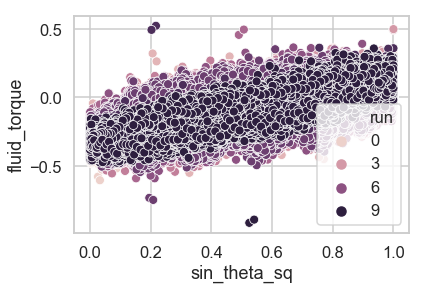

In [71]:
sns.scatterplot(x='sin_theta_sq', y='fluid_torque', hue = 'run', data=df_all)
#yep, the relationship now appears to be pretty linear

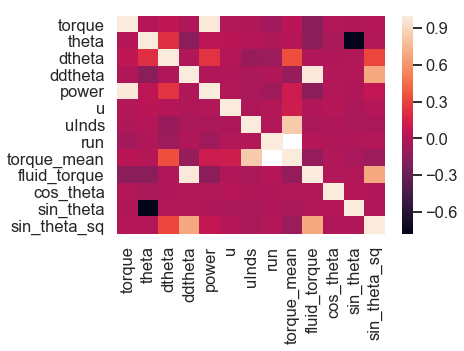

In [69]:
# calculate the correlation matrix
corr = df_all.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [72]:
from sklearn.linear_model import LinearRegression

In [80]:
#make a super basic linear regression to get fluid torque from sin_theta_sq
Train_X = df_all.loc[df_all['run']!=9][['sin_theta_sq','theta']]
Train_Y = df_all.loc[df_all['run']!=9]['fluid_torque']
Test_X = df_all.loc[df_all['run']==9][['sin_theta_sq','theta']]
Test_Y = df_all.loc[df_all['run']==9]['fluid_torque']

In [81]:
reg = LinearRegression().fit(Train_X,Train_Y)

In [82]:
reg.score(Test_X,Test_Y)
#Not fantastic. Okay so this is the baseline metric to beat.

0.6559395565709797

In [85]:
reg.coef_

array([ 0.36935923, -0.02057329])

## Using data with more Variance

The model used above only works at all because the experiments were performed with a constant wind velocity and constant power and the experiments used a two-bladed turbine. If we want to make a model that can adress other geometries we need data that captures more variance.

I went back to the company I was consulting for and asked for data for variable wind speeds to train a more sophisticated model. Below is some initial exploration of that data.

In [27]:
cwd = os.getcwd()
data_dir = cwd + '/raw_data/FullControlTests'
os.listdir(data_dir)

['.DS_Store',
 'PwKw2Test10',
 'PwKw2Test8',
 'PwKw2Test6',
 'PwKw2HelicalTest2',
 'PwKw2Test1',
 'PwKw2HelicalTest5',
 'PwKw2HelicalTest4',
 'PwKw2Test7',
 'PwKw2HelicalTest3',
 'PwKw2Test9',
 'PwKw2HelicalTest8',
 'PwKw2Test2',
 'PwKw2HelicalTest6',
 'PwKw2Test5',
 'PwKw2HelicalTest1',
 'PwKw2Test4',
 'PwKw2Test3',
 'PwKw2HelicalTest7']

In [7]:
def load_all_tests(directory, max_test):
    for i in range(1,max_test+1):
        with open(data_dir + '/PwKw2Test'+str(i)+'/pointData.txt') as json_data:
            data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient = 'index')
        df = df.transpose()
        df['run']=i
        if i == 1:
            df_all = df
        else:
            df_all = pd.concat([df_all,df],axis=0,ignore_index=True)
    return df_all

In [8]:
df_variable = load_all_tests(data_dir, 10)

TypeError: Expected list, got dict

In [28]:
with open(data_dir + '/PwKw2Test'+str(1)+'/pointData.txt') as json_data:
    data = json.load(json_data)

In [29]:
df = pd.DataFrame.from_dict(data, orient = 'columns')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [30]:
data.keys()

dict_keys(['fd', 'fds', 'td', 'tds'])

In [33]:
data['fds'].keys()

dict_keys(['Uinf', 'stdUinf', 'TI', 'temp'])

In [36]:
data['tds'].keys()

dict_keys(['mini45', 'stdmini45', 'nano', 'stdnano', 'FX', 'stdFX', 'cycleAvFX', 'FY', 'stdFY', 'cycleAvFY', 'FZ', 'stdFZ', 'cycleAvFZ', 'MZ', 'stdMZ', 'cycleAvMZ', 'turbPos', 'stdturbPos', 'cycleAvturbPos', 'turbVel', 'stdturbVel', 'cycleAvturbVel', 'turbAcc', 'stdturbAcc', 'cycleAvturbAcc', 'torqueCommand', 'stdtorqueCommand', 'cycleAvtorqueCommand', 'power', 'stdpower', 'cycleAvpower', 'eff', 'stdeff', 'cycleAveff', 'cTorque', 'stdcTorque', 'cycleAvcTorque', 'cThrust', 'stdcThrust', 'cycleAvcThrust', 'cLat', 'stdcLat', 'cycleAvcLat', 'cVert', 'stdcVert', 'cycleAvcVert', 'TSR', 'stdTSR', 'cycleAvTSR', 'alpha_n', 'stdalpha_n', 'cycleAvalpha_n', 'U_n', 'stdU_n', 'cycleAvU_n'])

In [43]:
df = json_normalize(data)

In [44]:
df.head()

fd  \
0  [{'temp': [15.736897638908076, 16.043212964575...   

                                              fds.TI  \
0  [0.041527530926978785, 0.04166464436290516, 0....   

                                            fds.Uinf  \
0  [0.9634255370388383, 0.962569277581335, 0.9614...   

                                         fds.stdUinf  \
0  [0.07689649263173386, 0.07559118838403482, 0.0...   

                                            fds.temp  \
0  [16.047352361075056, 16.05149175757994, 16.055...   

                                                  td  \
0  [{'mini45': [[-0.9243142294852544, -3.58845622...   

                                              tds.FX  \
0  [25.282426421034362, 24.894823008873193, 24.51...   

                                              tds.FY  \
0  [-4.8840442443989955, -4.791881939576405, -4.6...   

                                              tds.FZ  \
0  [-0.14166554234350298, -0.009921891401238453, ...   

                                              tds.MZ  \
0  [0.1488033606727945, 0.17213264930175418, 0.18...   

                         ...                          \
0                        ...                           

                                         tds.stdnano  \
0  [[12.792868062399037, 10.440078671950918, 1.79...   

                                        tds.stdpower  \
0  [1.580388454581225, 1.5315730391544669, 1.5875...   

          tds.stdtorqueCommand  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                      tds.stdturbAcc  \
0  [44.65461043561947, 44.84226382690118, 45.2139...   

                                      tds.stdturbPos  \
0  [1.8117191029120705, 1.811275221656391, 1.8117...   

                                      tds.stdturbVel  \
0  [5.221963354290044, 5.266595498172507, 5.24475...   

             tds.torqueCommand  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                         tds.turbAcc  \
0  [-0.18796753267326757, -0.13306038488732175, -...   

                                         tds.turbPos  \
0  [3.1188916499237926, 3.1152416473113638, 3.113...   

                                         tds.turbVel  
0  [25.780051685242782, 24.600051139346878, 23.72...  

[1 rows x 61 columns]